# Python akademie

---

<br>

## Obsah lekce
---

1. [Úvod do chyb](#Úvod-do-chyb),
2. [Druhy chyb](#Druhy-chyb),
3. [Odchytávání výjimek](#Odchytávání-výjimek),
4. [Debugování](#Debugování),

---

<br>

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.iyRtgmUPNPU7-T9k3gdF6gHaHa%26pid%3DApi&f=1&ipt=830e70c5fb64bc9c6ee474185a2c94132c6c4580e63315751b258bc3e61ba233&ipo=images" width="150" style="margin-left:auto; margin-right:auto">

## Úvod do chyb

---

**Chybu může udělat každý**. Programátory, analytiky, obecně pythonisty nevyjímaje.

Pokud uděláš chybu, *interpret* ji při spuštění:
* vystopuje,
* pozná,
* zatřídí.

Jelikož chybu udělá programátor pouze výjimečně, určitě si také uslyšíš označení **výjimka** (z angl. *exception*).

<br>

Velmi obecně, pokud uděláš chybu, můžou nastat tyto situace:
1. Program **zcela selže** (doprovázeno výjimkami),
2. program se **nechová podle očekávání** (doprovázeno debugováním).

Jiné rozdělení (exaktnější) můžeš aplikovat **na průběh tvého programu**:
1. **Syntaktické chyby**, nedodržení předpisu jazyka Python (způsobí *výjimku*),
2. **Běhové chyby**, chyba se projeví až při interpretování našeho zápisu (způsobí *výjimku*),
3. **Logické chyby**, kód funguje jinak než bylo zamýšleno (musíš *debugovat*).



<img src="https://cdn.dribbble.com/users/1692681/screenshots/10226579/bugs_icons_4x.jpg" width="500" style="margin-left:auto; margin-right:auto">



### Co je Traceback

**Traceback** je zpráva, kterou Python zobrazí při chybě. Pomáhá najít místo a příčinu chyby v kódu.

---

#### Struktura Tracebacku

1. **Cesta k chybě**:
   - Postup Pythonu, který vedl k chybě.
   - Uvádí funkce a soubory, kterými Python procházel.

2. **Typ chyby**:
   - Typ chyby na konci tracebacku, např. `TypeError`, `NameError`.

3. **Popis chyby**:
   - Krátký popis, co se pokazilo (např. „unsupported operand type(s) for +: 'int' and 'str'“).

---

#### Příklad Tracebacku

Kód s chybou:

In [ ]:
def vrat_polovinu(cislo):
    return cislo / 2

print(vrat_polovinu("deset"))


---

#### Jak číst Traceback

1. **Nejvyšší řádek**: Začátek chyby, zde `print(vrat_polovinu("deset"))`.
2. **Prostřední řádky**: Kroky, kterými Python prošel.
3. **Poslední řádek**: Typ chyby a popis – zde `TypeError: unsupported operand type(s) for /: 'str' and 'int'`.

---

#### Proč je Traceback užitečný?

- Rychlá identifikace chyby a její příčiny.
- Sledováním tracebacku lze pochopit, kde program nefunguje, což je klíčové pro opravu.

---

> **Tip**: Zaměřte se na poslední řádek tracebacku – typ chyby a popis často rychle napoví, co opravit.

## Druhy chyb

---

<br>

### Syntaktické chyby

---

Čím více **řádků kódu napíšeš**, tím více se s těmito chybami setkáš.

In [ ]:
if "@" in "matous@matous.cz"
    print("Pravda")
else:
    print("Neni pravda")

In [ ]:
if "@" in "matous@matous.cz":
    print("Pravda")
else:
    print("Neni pravda")

V ukázce výše je nějaký problém.

*Interpret* se snaží pomoci, ale ne vždy je to pro něj jednoduché.

Proto existuje celá řada **statických zvýrazňovačů** a pomůcek, které umí tyto problémy včas odhalit:
1. [pylint](https://pypi.org/project/pylint/),
2. [flake8](https://flake8.pycqa.org/en/latest/).

Pokud používáš **editor**, nebo **IDE**, vyzkoušej, jestli už neobsahují podobný zabudovaný **zvýraznovač** (z angl. *linter*).

Právě takového pomůcky dovedu rozeznat chybný zápis **již na počátku**.

Proto by takový nástroj měl být **základní pracovní pomůckou** každého programátora.

#### Linter (statický zvýrazňovač)
Linter je nástroj pro analýzu kódu, který:

- Detekuje chyby: Odhaluje syntaktické chyby a potenciální problémy v kódu.
- Kontroluje styl: Zajišťuje dodržování stylu kódování podle předem definovaných pravidel (např. PEP8 pro Python).
- Zlepšuje čitelnost: Pomáhá udržovat konzistentní a čitelný kód.
- Nabízí doporučení: Poskytuje návrhy pro lepší psaní kódu a zvyšuje efektivitu vývoje.
- Automaticky opravuje: Některé lintery umí automaticky opravit základní chyby ve formátování.


In [ ]:
%%file linter_demo.py

def  addNumbers( a,b ):
    result = a + b 
    print( "Sum is:",result )

def main( ):
  print( "Starting program..." )
  addNumbers(2 ,3)
  addNumbers(4 , 5)
  addNumbers(6, 7)
  
main()


In [ ]:
%pip install pylint

In [ ]:
!pylint linter_demo.py

**Linter** jen poukazuje na chyby, co když chci automaticky chyby opravit.

Na to jsou formátovače (formatters). Jedním takovým je **black**

In [ ]:
%pip install black

In [ ]:
!black linter_demo.py

**Extension do VS Code**

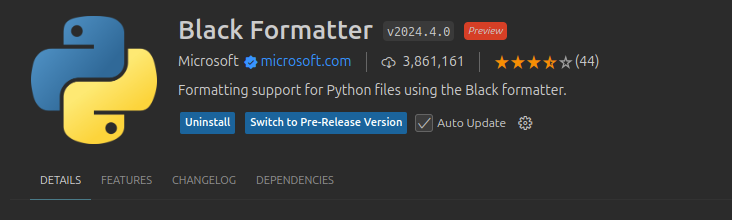

<br>

### Běhové chyby

---

S **běhovou chybou** se setkáš v průběhu programu.

Pokud tvůj zápis **dostatečně neošetříš**, může fungovat většinu času, ale **ne pokaždé**:

In [ ]:
def vrat_polovinu(cislo: int) -> float:
    return cislo / 2

In [ ]:
for cislo in (1, 2, 3, 4, 5):
    print(vrat_polovinu(cislo))

<br>

Program klidně může fungovat pro naprostou většinu **běžných scénářů**.

In [ ]:
for cislo in (1, 2, "3", 4, 5):
    print(vrat_polovinu(cislo))

Nicméně ne pokaždé.

V některých krajních případech, může být průběh přerušený **výjimkou**.

Tento typ chyb již **není tak triviální**. Přesto existují různé postupy, jak se výjimkám vyvarovat:
1. *Type hints*,
2. *mypy*,
3. *unit testy*,
4. *odchytávání výjimek* (z angl. *error handling*).

#### Typy běhových chyb

1. **NameError**
   - Pokus o použití proměnné nebo funkce, která není definovaná.

In [ ]:
print(neznam)

2. **TypeError**
   - Neplatná operace mezi neslučitelnými typy.

In [ ]:
"text" + 5

In [ ]:
"text" + "5"

3. **ValueError**
   - Správný typ argumentu, ale nesprávná hodnota.

In [ ]:
int("abc")

In [ ]:
int("5")

4. **IndexError**
   - Přístup k neexistujícímu indexu v seznamu nebo jiném indexovatelném objektu.
   

In [ ]:
my_list = [1, 2]
print(my_list[5])

5. **KeyError**
   - Pokus o přístup k neexistujícímu klíči ve slovníku.

In [ ]:
my_dict = {"name": "Daniel"}
print(my_dict["age"])

In [ ]:
my_dict = {"name": "Daniel"}
print(my_dict.get("age", 0))

6. **AttributeError**
   - Přístup k neexistujícímu atributu nebo metodě objektu.
   

In [ ]:
my_list = [1, 2]
my_list.add(3)

7. **ZeroDivisionError**
   - Pokus o dělení nulou.

In [ ]:
10 / 0

8. **ImportError**
   - Import modulu, který neexistuje nebo nemůže být nalezen.

In [ ]:
import mathů

9. **FileNotFoundError**
   - Pokus o otevření souboru, který neexistuje.

In [ ]:
open("non_existent_file.txt")

10. **OverflowError**
    - Výsledek matematické operace je mimo rozsah podporovaný typem.

In [ ]:
import math
math.exp(1000)

11. **MemoryError**
    - Nedostatek paměti k dokončení operace.

In [ ]:
[0] * 10**10

12. **RecursionError**
    - Překročení maximální hloubky rekurze.

In [ ]:
def nekonecna_rekurze():
    return nekonecna_rekurze()

nekonecna_rekurze()


#### Mypy

- Knihovna mypy je nástroj pro statickou kontrolu typů v Pythonu.
- Pomáhá odhalit typové chyby již při vývoji.
- Zpřehledňuje kód pomocí typových anotací, zvyšuje jeho čitelnost a usnadňuje údržbu, zejména při refaktoringu.

**Instalace**

In [ ]:
%pip install mypy

**Vytvoření demo souboru**

In [ ]:
%%writefile mypy_demo.py

# test_mypy_errors.py

from typing import List, Dict, Tuple, Optional, Union, Any, Callable

# 1. Nesprávný návratový typ
def add(a: int, b: int) -> int:
    return str(a + b)  # Chyba: Funkce má vracet int, ale vrací str

# 2. Chybná anotace proměnné
age: str = 25  # Chyba: Typ age je anotován jako str, ale přiřazeno je int

# 3. Špatné typy v seznamu
names: List[int] = ["Alice", "Bob", "Charlie"]  # Chyba: Seznam int, ale přiřazen je seznam str

# 4. Volitelný typ s nevhodnou kontrolou
def greet(name: Optional[str]) -> str:
    return "Hello, " + name  # Chyba: name může být None, což nelze konkatenovat se str

# 5. Nesprávné typy ve slovníku
user_data: Dict[str, int] = {"name": "Daniel", "age": "30"}  # Chyba: age má být int, ale je str

# 6. Sjednocení typů s chybou
def process_data(value: Union[int, str]) -> int:
    return value + 10  # Chyba: Union neumožňuje automatickou konverzi str na int

# 7. Volání funkce s chybnými typy argumentů
def multiply(a: int, b: int) -> int:
    return a * b

result = multiply("5", 10)  # Chyba: Argument a má být int, ale je str

# 8. Callable s nesprávnými typy
def operate(func: Callable[[int, int], int], x: int, y: int) -> int:
    return func(x, y)

def invalid_func(a: str, b: str) -> str:
    return a + b

operate(invalid_func, 5, 10)  # Chyba: invalid_func má špatné typy argumentů i návratový typ

# 9. Použití `Any` bez jasného určení typu
data: Any = "Hello"
number: int = data  # Chyba: mypy odhalí, že data může být libovolného typu

# 10. Typový alias s chybným přiřazením
UserData = Dict[str, str]
user: UserData = {"id": 1, "name": "Alice"}  # Chyba: id má být str, ale je int

# 11. Typový alias pro n-tice s nesprávným typem
Point = Tuple[int, int]
location: Point = (1.5, 2.5)  # Chyba: Tuple má mít int, ale má float

# 12. Zanedbání typu None u návratového typu Optional
def find_user(user_id: int) -> Optional[str]:
    return None

user = find_user(1) + " found"  # Chyba: find_user může vracet None, nelze přidat k str

# 13. Typy přiřazené špatně u parametrů funkce
def divide(a: int, b: int) -> float:
    return a / b

result = divide(10, "2")  # Chyba: b má být int, ale je str

# 14. Nesprávné volání funkce s Optional
def process_name(name: Optional[str]) -> str:
    return name.upper()  # Chyba: name může být None

# 15. Chybný typový alias se seznamem
IntList = List[int]
numbers: IntList = [1, 2, "3", 4]  # Chyba: Seznam má obsahovat pouze int, ale obsahuje str

# 16. Funkce s chybným návratovým typem
def get_number() -> int:
    return "42"  # Chyba: Funkce má vracet int, ale vrací str

# 17. Chybný typ při inicializaci třídy
class Car:
    def __init__(self, speed: int) -> None:
        self.speed = speed

my_car = Car("fast")  # Chyba: speed má být int, ale je str

# 18. Kombinace Optional a Union s nevhodným typem
def get_age(age: Union[int, None]) -> int:
    return age  # Chyba: age může být None, což nelze přiřadit k int

# 19. Nesprávné volání Callable s typem návratu
def apply_operation(func: Callable[[int, int], str], x: int, y: int) -> str:
    return func(x, y)

def add_ints(a: int, b: int) -> int:
    return a + b

result = apply_operation(add_ints, 5, 10)  # Chyba: add_ints má špatný návratový typ

# 20. Kombinace typů s chybou
def concatenate(x: Union[int, str], y: Union[int, str]) -> str:b
    return x + y  # Chyba: mypy neví, jak provést součet pro int + str



In [ ]:
!mypy mypy_demo.py

<br>

### Logické chyby

---

**Logickou chybu** nepoznáš snadno, pakliže vůbec.

Program totiž spustíš **bez komplikací**.

Teprve až po zevrubné kontrole hodnot, případně výstupu, můžeš vidět nejasnosti:

In [ ]:
x = 3
y = 5

In [ ]:
prumer = x + y / 2  # 3 + 5 = 8   ->   8 / 2 -> 4

In [ ]:
print(prumer)

In [ ]:
prumer = (x + y) / 2
print(prumer)

Bránit se proti takovým chybám, **není jednoduché**.

Odhalení často přijde až **na samotné uživatele**.

Pomoci můžou:
1. *Unit testy*,
2. *integrační testy*,
3. *přehledná dokumentace*,
4. *debugování*.

### Unit testy s knihovnou Pytest

**Unit test**: Automatický test, který testuje velmi malou část kódu tzv. jednotku (unit):

- funkce
- metoda

In [ ]:
%%file prumer.py

def vypocti_prumer_dvou_cisel(x, y):
    return x + y / 2

**Instalace knihovny Pytest**

In [ ]:
%pip install pytest

**Definování jednoduchého testu**

In [ ]:
assert True == True

In [ ]:
assert True == False, "Chyba"

In [ ]:
%%file test_prumer.py

from prumer import vypocti_prumer_dvou_cisel

def test_vypocti_prumer_dvou_cisel(): # funkce musí začínat podtržítkem
    assert vypocti_prumer_dvou_cisel(3, 5) == 4

**Spuštění testů**

In [ ]:
!pytest

---

❗❗❗ **Pokročilé téma** ❗❗❗: **Využití dekorátorů**

In [ ]:
%%file test_prumer.py
import pytest

from prumer import vypocti_prumer_dvou_cisel

# Parametrizace s několika testovacími případy
@pytest.mark.parametrize("a, b, expected", [
    (3, 5, 4),      # průměr z 3 a 5 je 4
    (10, 20, 15),   # průměr z 10 a 20 je 15
    (0, 0, 0),      # průměr z 0 a 0 je 0
    (-4, 4, 0),     # průměr z -4 a 4 je 0
    (7, 3, 5)       # průměr z 7 a 3 je 5
])
def test_vypocti_prumer_dvou_cisel(a, b, expected):
    assert vypocti_prumer_dvou_cisel(a, b) == expected


In [ ]:
!pytest

<br>

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.CVj91OGvRBV4UGvUsJrcBgHaHa%26pid%3DApi&f=1&ipt=e774a9aaac10c086f91ae1851f821e46bd798de75021e978f3b24dbb06dc71db&ipo=images" width="150" style="margin-left:auto; margin-right:auto">

## Odchytávání výjimek

---

*Výjimka* ale nutně neznamená konec světa.

Jsou **to objekty** jako každý jiný.

Proto s nimi můžeš manipulovat (z angl. *error handling*).

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    return delenec / delitel

In [ ]:
print(
    vydel_dve_cisla(4, 2),
    vydel_dve_cisla(14, 7),
    vydel_dve_cisla(117, 3),
    sep="\n"
)

<br>

Pokud ovšem zadáš jiný **typ argumentu**:

In [ ]:
print(vydel_dve_cisla("4", 2))

<br>

A nezapomeň **na nulu**:

In [ ]:
print(vydel_dve_cisla(4, 0))

Než na všechny možné i nemožné scénáře psát podmínky a udělátka, je lepší *interpretu* sdělit, že jde o pokus.

<br>

### Try, tedy vyzkoušej

---

Pro vyzkoušení použij rezervované slovo `try`:

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    try:
        vysledek = delenec / delitel
    
    return vysledek

Pozor, syntaxe **není kompletní**, každým vyzkoušením naznačuješ, že může nastat *výjimka*.

Proto je nutné, nachystat se, pokud se skutečně objeví.

<br>

### Try/except

---

Syntaxi uzavřeš tak, že přidáš větev `except` (podobná struktura jako podmínkové větve):

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    try:
        vysledek = delenec / delitel
    
    except:
        print("Nelze vydělit!")
        vysledek = None

    return vysledek

In [ ]:
vydel_dve_cisla(4, 0)    # ZeroDivisionError

In [ ]:
vydel_dve_cisla("4", 2)  # TypeError

In [ ]:
print(vydel_dve_cisla(12, 3))

Pokud nyní nastane **jakákoliv výjimka**, spustí *interpret* ohlášení ve větvi `except`.

Pokud se však výjimka neobjeví, vrátí řádný výsledek.

```python
        vysledek = None
```

Proměnnou `vysledek` je nutné nachystat pro oba případy, jinak by ji *interpret* neuměl u výjimku vytvořit.

Jelikož zápis ve `try` selhal.

```python
    except:
        print("Nelze vydělit!")
        vysledek = None
```

**Žádná výjimka** by neměla zůstat implicitně označená.

Vždý si proto přesně nachystej, co má tebou zapsaná větev `except` chytat.

Pokud nemáš jistotu, použij `except Exception`:

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    try:
        vysledek = delenec / delitel
    
    except Exception as error:  # trochu lepší řešení
        print("Nelze vydělit!")
        print(repr(error))
        print(type(error))
        print(error)
        # print(dir(error))
        vysledek = None

    return vysledek

In [ ]:
print(vydel_dve_cisla(4, 2))

In [ ]:
print(vydel_dve_cisla(4, 0))

In [ ]:
vydel_dve_cisla("4", 1)

Pokud víš, co chceš chytat za výjimky, vypiš je:

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    try:
        vysledek = delenec / delitel
    
    except (TypeError, ZeroDivisionError):  # neúplně perfektní!
        print("Nelze vydělit!")
        vysledek = None

    return vysledek

In [ ]:
print(vydel_dve_cisla(4, 2))

In [ ]:
print(vydel_dve_cisla(4, 0))

In [ ]:
print(vydel_dve_cisla("4", 1))

Pokud potřebuješ pro oba výjimkové scénáře různé průběhy, větví `except` můžeš mít více:

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    try:
        vysledek = delenec / delitel
    
    except TypeError:
        print(f"Nelze vydělit zadaný datový typ! {type(delenec)} nebo {type(delitel)}")
        vysledek = None
    except ZeroDivisionError:
        print("Nelze dělit nulou!")
        vysledek = None

    return vysledek

In [ ]:
vydel_dve_cisla(4, 2)

In [ ]:
vydel_dve_cisla(4, 0)

In [ ]:
vydel_dve_cisla("4", 1)

In [ ]:
vydel_dve_cisla(4)

Obvykle však bývá přehlednější zkoušet **v jeden moment** (výraze), **jeden proces**.

<br>

### try/except/else

---

Často se **na třetí větev** zapomíná.

Slouží k tomu, ať máš kam napsat následná ohlášení, která potřebuješ potom, co úspěšně vyzkoušíš kus kódu.

Tedy nechat větev `try` a její obsah, **co nejstručnější**:

In [ ]:
def vydel_dve_cisla(delenec: int, delitel: int) -> float:
    try:
        vysledek = delenec / delitel

    except TypeError:
        print("Nelze vydělit zadaný datový typ!")
        vysledek = None
    except ZeroDivisionError:
        print("Nelze dělit nulou!")
        vysledek = None
    else:
        print("Úspěšné dělení obou argumentů")
        print(vysledek)

In [ ]:
vydel_dve_cisla(4, 2)

In [ ]:
vydel_dve_cisla(4, 0)

In [ ]:
vydel_dve_cisla("4", 1)

<br>

### 🧠 CVIČENÍ 🧠, Vyzkoušej si práci s *handlováním výjimek*:

Vytvoř funkci `vrat_zemi_objednavky`, která přijímá parametr typu slovníku s vnořenými strukturami.
1. Funkce vrací buď hodnotu typu `str` představující zemi objednávky, nebo `None` při neúspěšném zpracování.
1. Funkce má primárně vyhledat klíč `channel` ve slovníku a získat jeho hodnotu.
1. Hodnota nalezená u klíče `channel` má být zpracována tak, aby se rozdělila podle mezery, přičemž vrátí zemi jako dvouznakový kód. Například z hodnoty 'eshop CZ' vrátí 'CZ'.
1. Funkce má ošetřit následující výjimky:
    - `KeyError`: pokud klíč 'channel' chybí ve struktuře dat.
    - `IndexError`: pokud klíč 'channel' existuje, ale jeho hodnota je prázdná nebo neobsahuje očekávané části pro rozdělení.
    - `AttributeError`: pokud hodnota klíče 'channel' nelze zpracovat jako řetězec.

In [ ]:
data_1 = {
    'order': {
        'id': '1234', 'type': 'order.created', 'channel': 'eshop CZ'
    }
}

data_2 = {
    'order': {
        'id': '1234', 'type': 'order.created', 'channel': ''
    }
}

data_3 = {
    'order': {
        'id': '1234', 'type': 'order.created'
    }
}

In [ ]:
# from typing import Dict

def vrat_zemi_objenavky(slovnik: dict) -> str | None:
    try:
        zeme = slovnik["order"]["channel"].split()[1]
    except (KeyError, IndexError, AttributeError):
        zeme = None
    return zeme

print(vrat_zemi_objenavky(data_1))
print(vrat_zemi_objenavky(data_2))
print(vrat_zemi_objenavky(data_3))


Pokud se tedy dostaneš do situace, kdy potřebuješ sadu ohlášení *interpretovat* pouze tehdy, pokud se **výjimka neobjeví**, nezapomeň `else` přidat.

<details>
  <summary>▶️ Klikni zde pro zobrazení řešení</summary>
   
```python
from typing import Dict, Optional

NestedDict = Dict[str, Dict[str, Optional[str]]]


def vrat_zemi_objednavky(responsed_data: Optional[NestedDict],
                         main_key: str = 'channel') -> Optional[str]:
    try:
        zeme_objednavky = responsed_data['order'][main_key]
        iso_kod_zeme = zeme_objednavky.split()[1]
    
    except KeyError:
        print('WARNING: Chybí klíč "channel"')
        return None
    except IndexError:
        print('WARNING: Chybí hodnota pro rozdělení.')
        return None
    except AttributeError:
        print('WARNING: Nelze řádně rozdělit hodnotu')
        return None
    else:
        return iso_kod_zeme
```
</details>

<br>

### try/except/else/finally

---

Poslední možností, jak zápis s odchytáváním vylepšit, je větev `finally`.

In [ ]:
from typing import Optional

def vydel_dve_cisla(delenec: int, delitel: int) -> Optional[float]:
    try:
        vysledek = delenec / delitel
    
    except TypeError:
        print("Nelze vydělit zadaný datový typ!")
        vysledek = None
    except ZeroDivisionError:
        print("Nelze dělit nulou!")
        vysledek = None
    else:
        print("Úspěšně vyděleno..")
        print(delenec, delitel, vysledek, sep="\n")
    finally:
        print("Ukončuji funkci s dělením.")
        return vysledek

In [ ]:
print(vydel_dve_cisla(4, 2))

In [ ]:
print(vydel_dve_cisla(4, 0))

In [ ]:
print(vydel_dve_cisla("4", 1))

Cokoliv, co do ní zapíšeš, bude spuštěno ať už se **výjimka objeví, nebo ne**.

### Souhrn

---

Syntaxe *zachytávání výjimek*, `try`, `except`, `else` a `finally` je tedy zápis, který použiješ, pokud se chceš:
* vyvarovat se mnoha `if` ohlášením,
* **při loggování** různých zpráv,
* při komunikaci **s jinými end-pointem** (nejčastěji API).

<br>

Pokud použiješ tento zápis, zkontroluj si, jaké větve lze použít:
1. Tedy nepřetěžovat větev `try` s dlouhým zápisem,
2. nepoužívat `except` větve implicitně, ale pro specifické výjimky,
3. nevynechávat `else`, pokud má vhodný účel.

In [ ]:
def nacti_zahlavi_souboru(obsah_souboru: tuple):
    """
    Vrať první záznam (záhlaví) z obsahu TXT souboru, pokud je k dispozici.
    """
    try:
        zahlavi = obsah_souboru[0]
        
    except IndexError:
        zahlavi = list()
        print("Zadaný objekt nelze indexovat")
    else:
        print("Záhlaví je k dispozici")
        zahlavi = zahlavi.split() if isinstance(zahlavi, tuple) else zahlavi
    finally:
        print("Vracím rozdělené záhlaví")
        return zahlavi

In [ ]:
nacti_zahlavi_souboru(
    (
        ("První řádek ", "se ", "záhlavím.\n"),
        ("druhý řádek ", "s ", "libovolným ", "textem\n")
    )
)

In [ ]:
nacti_zahlavi_souboru(
    ()
)

<br>

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.vk3rU9vi5NMRqyNhP8HZPQHaHa%26pid%3DApi&f=1&ipt=6aa9fd67b68b37ed47acb0d3b54413c2c450da0bce2a1c847a830974157707b6&ipo=images" width="150" style="margin-left:auto; margin-right:auto">

## Debugování
---


Proces *debugování* je označení, které popisuje odstraňování chyb.

Původ slova *ladění*, najdeš u vědkyně [Grace Hopper](https://en.wikipedia.org/wiki/Debugging).

V Pythonu to prakticky vypadá tak, že v programu či zápise snažíš:
1. Naleznout místo, které **vyvolává výjimku**,
2. naleznout místo, které **způsobuje neočekávané chování**.

<br>

### Zadání

---

In [ ]:
def formatuj_jmeno(string, symbol: str = "."):
    """
    :Example:
    >>> formatuj_jmeno("marek.parek")
    'Marek'
    """
    jen_jmeno = string.split(symbol)
    print(type(jen_jmeno))
    print(jen_jmeno)
    return " ".join(jen_jmeno).title()

In [ ]:
def vytvor_pozdrav(jmeno: str, formatovaci_fce: callable) -> str:
    """
    :Example:
    >>> vytvor_pozdrav("marek.parek")
    'Toto je Marek, zdravíme!'
    """
    return " ".join(("Toto je", "".join(formatovaci_fce(jmeno)), "zdravíme!"))

In [ ]:
print(vytvor_pozdrav("petr.svetr", formatuj_jmeno))

<br>

Co nám *interpret* vypsal:
* `AttributeError`, tedy typ výjimky, kterému interpret chybu přiřadil,
* `Traceback`, postup, odkud chybu stopoval,
* `<v_cem> in <kde>`, prostředí, kde se chyba projevila,
* `'list' object has no attribute 'title'`, popisek výjimky.

Vidíš tedy, kde všude *interpret* prošel tvůj zápis a co se mu *nepozdávalo*.

<br>

### Debugování

---

Nejlepší, co na začátek můžeš provést, je udělat si v situaci jasno.

Vědět, s čím máš tu čest.

K tomu ti pomůže hned několik zabudovaných funkcí:
* `print`,
* `type`,
* `dir`,
* `vars`,
* `locals`,
* `globals`.

#### print

---

Pomocí **jednoduchého výstupu** uvidíš, s čím vůbec pracuješ:

In [ ]:
def formatuj_jmeno(string, symbol: str = "."):
    """
    :Example:
    >>> rozdel_string("marek.parek")
    'Marek'
    """
    jen_jmeno = string.split(symbol)
    print(jen_jmeno)                  # doplněná zab. funkce
    # return jen_jmeno.title() 

In [ ]:
formatuj_jmeno("petr.svetr")

<br>

Funkce `vars`, `locals`, `globals` tedy není třeba aplikovat.

Ze zápisu je patrné, že pracuješ **se správným objektem**.

#### type

Když vidíš, jak hodnoty vypadají, je potřeba ověřit, jak je zpracuje *interpret*:

In [ ]:
def formatuj_jmeno(string, symbol: str = "."):
    """
    :Example:
    >>> rozdel_string("marek.parek")
    'Marek'
    """
    jen_jmeno = string.split(symbol)
    print(vars(), locals(), globals(), sep="\n")
    # print(type(jen_jmeno))            # doplněná zab. funkce
    # return jen_jmeno.title() 

In [ ]:
formatuj_jmeno("petr.svetr")

Teď, když znáš datový typ, můžeš zkontrolovat, jestli pracuješ **se správnou metodou**.

#### dir

---

Pomocí zab. funkce `dir` ověříš, které metody máš **pro konkrétní objekt** k dispozici:

In [ ]:
def formatuj_jmeno(string, symbol: str = "."):
    """
    :Example:
    >>> rozdel_string("marek.parek")
    'Marek'
    """
    jen_jmeno = string.split(symbol)
    print(dir(jen_jmeno))              # doplněná zab. funkce
    # return jen_jmeno.title()         # metoda, kterou ve výstupu hledám

In [ ]:
formatuj_jmeno("petr.svetr")

In [ ]:
print('title' in dir(list))

<br>

Vidíš, že použitou metodu skutečně ve výstupu nenajdeš.

Takže hodnoty, které zpracováváš a metody, které k tomu používáš, **nejsou kompatibilní**:

In [ ]:
cele_jmeno = ['petr', 'svetr']

In [ ]:
print(cele_jmeno[0].title())

V tento okamžik dovedeš celou situaci **jednoduše replikovat**.

To samozřejmě není vždy nutné, ale obzvlášť ze začátku, pomáhá spojovat souvislosti.

In [ ]:
def formatuj_jmeno(string, symbol: str = "."):
    """
    :Example:
    >>> rozdel_string("marek.parek")
    'Marek'
    """
    try:
        jen_jmeno = string.split(symbol)[0]
        
    except IndexError:
        vystup = string
        print("Nelze indexovat")    
    except AttributeError:
        vystup = string
        print("Nelze použít zadané metody")
    else:
        vystup = jen_jmeno.title()
        print("Ukládám zadanou hodnotu...")
    finally:
        return vystup

In [ ]:
print(formatuj_jmeno("petr.svetr"))

In [ ]:
print(formatuj_jmeno(""))

In [ ]:
print(formatuj_jmeno(None))

<br>

### Debugování, náročnější situace

---

Pokud je problém náročnější, pro odhalení, budeš potřebovat silnější nástroj:
* knihovna `pdb` (není intuitivní, ale můžeš jej použít všude),
* **debugger** součástí editoru/IDE (graficky pohodlné ovládání, ne vždy dostupné).

#### Demo: pomocná úloha

---

Napiš funkci `projdi_vsechny_udaje`, která prochází různé množství zadaných stringů. Procházej pomocí této funkce tak dlouho, dokud nenarazíš na řádek obsahující string `'end'`.
Potom proces zastav.

Tyto stringy jsou emailové adresy, ze kterých chceš vypsat jméno, příjmení a doménu. Pomocí funkce `rozdel_email` získej vždy první část ze stringu a zbytek. Obě části vrať.

In [ ]:
%%file debug_uloha.py
def projdi_vsechny_udaje(*emaily):
    jmena = set()
    
    for email in emaily:
        if "end" in email:
            break
        jmeno, domena = rozdel_email(email)
        jmena.add(jmeno)
    return jmena

def rozdel_email(email: str) -> list:
    return email.split("@")

if __name__ == "__main__":
    projdi_vsechny_udaje(
        'petra.fulinova@firma.cz',  # 'petra.fulinova', 'firma.cz'
        'adela.vancurova@firma.cz',
        'andrea.hertlova@firma.cz',
        'petr.vyhnis@firma.cz',
        'jan.feckanin@firma.cz',
        'pavel.harant@firma.cz',
        'zdenka.bendova@firma.cz',
        'monika.miczova@firma.cz',
        'jan.mosquito@firma.cz',
        'barbora.suvova@firma.cz',
        'lenka.kafkova@firma.cz',
        'nikola.hoffmannova@firma.cz',
        'daniela.sedlakova@firma.cz',
        'ivana.jerabkova@firma.cz',
        'valeria.jagerska@firma.cz',
        'hana.bayerova@firma.cz',
        'tomas.zamecnik@firma.cz',
        'helena.strasilova@firma.cz',
        'jana.kralova@firma.cz',
        'hermina.duskova@firma.cz',
        'dana.mirgova@firma.cz',
        'end',
        '...'
    )

In [ ]:
from debug_uloha import projdi_vsechny_udaje

projdi_vsechny_udaje(
    'petra.fulinova@firma.cz',  # 'petra.fulinova', 'firma.cz'
    'adela.vancurova@firma.cz',
    'andrea.hertlova@firma.cz',
    'petr.vyhnis@firma.cz',
    'jan.feckanin@firma.cz',
    'pavel.harant@firma.cz',
    'zdenka.bendova@firma.cz',
    'monika.miczova@firma.cz',
    'jan.mosquito@firma.cz',
    'barbora.suvova@firma.cz',
    'lenka.kafkova@firma.cz',
    'nikola.hoffmannova@firma.cz',
    'daniela.sedlakova@firma.cz',
    'ivana.jerabkova@firma.cz',
    'valeria.jagerska@firma.cz',
    'hana.bayerova@firma.cz',
    'tomas.zamecnik@firma.cz',
    'helena.strasilova@firma.cz',
    'jana.kralova@firma.cz',
    'hermina.duskova@firma.cz',
    'dana.mirgova@firma.cz',
    'end',
    '...'
)

Po spuštění se ale stalo něco podivného.

Vidíš, že funkce neprošly všechny zadané hodnoty.

Protože se neobjevila **žádná výjimka**, je potřeba debugovat sofitikovanějšími způsoby:
1. Knihovna `pdb`,
2. Pycharm, debugger.

<img src="https://media.giphy.com/media/3owzWdbe27j9q0V6hi/giphy.gif" width="600" style="margin-left:auto; margin-right:auto">

### Knihovna pdb

---

Primárně jde o knihovnu, která pracuje **v prostředí příkazového řádku** (CLI).

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP._1X9WAzqgLeKpoKDZmXKYgHaHa%26pid%3DApi&f=1&ipt=b9b8512501bbb779b6f2c8e87c0c0165d7d230f16ba6739c92abeb65d6b86aae&ipo=images" width="150" style="margin-left:auto; margin-right:auto">


To sice není vždy praktické.

Ale často nemáš jako programátor k dispozici **žádné grafické prostředí** (produkční/testovací server).

Proto je užitečné ovládat alespoň základy.

V příkazovém řádku:
```
$ python -m pdb <jmeno_souboru>.py
```

Nyní se nacházíš **v interaktivním prostředí Pdb**, pro nápovědu zapiš a potvrď klávesou *enter* `?`: 
```
> absolutni/cesta/k/souboru/..
-> __doc__
(Pdb)
```
```
(Pdb) ?
```

Základní orientace a příkazy:
* `s`tep, krok, jeden krok v programu,
* `c`ontinue, proveď, spusť celý program (nebo dokud můžeš),
* `l`ist, zobraz, kde se nachází program.

Základním stavebním kamenem pro debugovací procesy **je breakpoint**.

Tedy místo, na které musíš dávát pozor a zastavit se na něm, pokud k němu v průběhu debugování dorazíš.

Umístění probíhá pomocí **příkazu a čísla řádku**:
* `b X`, nastaví breakpoint na xtý řádek,
* `b`, zobrazí všechny breakpointy,
* `clear X`, odstraní breakpoint s číslem X.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.fplwh6HwSmeQNRefCaklgAAAAA%26pid%3DApi&f=1&ipt=31d518690fc1f295730182b3ef3c55c3e0d3b5c3369db4314faa6672f53b3064&ipo=images" width="150" style="margin-left:auto; margin-right:auto">


### Pycharm

---

Po té, co si poprvé spustíš **tvůj program**, se ti zpřístupní možnost kliknout na tlačítkou **Debug**.

**V pravém horním rohu** obrazovky si můžeš všimnout ikonky zeleného broučka, klikni na ni.

<br>

Po kliknutí se ti v dolní části obrazovky objeví nová pracovní karta **s nadpisem Debug**.

Základním stavební kámen už tedy znáš, *breakpoint*.

<br>

Tím interpretovi naznačíš, které místo ve tvém zápise tě zajímá.

V PyCharm zadáš breakpoint jednoduše tak, že **klikneš do šedého prostoru za číslem řádku** (uvidíš posléze červenou tečku).

<br>

Těchto breakpointů si můžeš nastavit tolik, kolik potřebuješ.

Obecně je ale lepší vybrat jich méně, kvůli snazší kontrole.

<br>

Jakmile interpret dojde postupně k breakpointu, dočasně program přeruší.

<br>

Jakmile máš vybraná místa označená *breakpointem*, můžeš spustit proces debugování znovu (ale tentokrát s breakpointy).

Pro opětovné spuštění použij ikonku **Resume** (symbol zelené šipky, najdeš ji v nové kartě, která se objevila při kliknutí na ikonku broučka):

<br>

Jakmile se proces odstranění chyby znovu spustí, dojde až k tebou vybranému breakpointu.

Nyní máš dvě možnosti:
* Zkontrolovat aktuální stav tvého programu,
* pokračovat v interpretování zápisu dále.

##### Kontrola současného stavu

K tomuto kroku slouží karta **Variables**.
Tady si můžeš všimnout všech objektů, se kterými interpret doposud pracoval.



#### **Pokračování**

Pokud neodhlálíš příčinu, musíš pokračovat **v další breakpointech**.

<br>

➡️ ➡️ **Formulář pro Tvoje hodnocení** [**desáté lekce**](https://forms.gle/6cpXWTsdPDiZNNjW8) ⬅️ ⬅️

<br>

---

# Když zbyde čas ⌛

## Logování

**Logování**: je proces zaznamenávání informací o běhu programu do logů.

- Umožňuje sledovat stav a chování aplikace v reálném čase nebo zpětně analyzovat události.
- Pomáhá při identifikaci chyb, ladění kódu a sledování výkonnosti aplikace.

**Výhody logování oproti `print`**:
- Možnost nastavení úrovně závažnosti zprávy (`DEBUG`, `INFO`, `WARNING`, `ERROR`, `CRITICAL`).
- Správa výstupů. Logy lze směřovat do konzole, souboru, na mail atd.
- Strukturovaný formát. Logy obsahují informace o čase, umístění souboru a úrovně závažnosti.
- Lze vypisovat různé úrovně podle prostředí (produkční, testovací, vývojové)

### Základní použítí knihovny `logging`

**Dokumentace**: [https://docs.python.org/3/library/logging.html](https://docs.python.org/3/library/logging.html)

In [1]:
import logging

# Konfigurace logování
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filename="eshop.log",
    filemode="w"
)

# Funkce pro výpočet celkové ceny položky
def vypocti_cenu_produktu(cena_za_kus, mnozstvi):
    try:
        if cena_za_kus < 0 or mnozstvi < 0:
            logging.warning("Záporná hodnota pro cenu nebo množství: cena=%s, množství=%s", cena_za_kus, mnozstvi)
            return 0
        celkova_cena = cena_za_kus * mnozstvi
        logging.info("Cena produktu vypočítána: cena=%s, množství=%s, celková cena=%s", cena_za_kus, mnozstvi, celkova_cena)
        return celkova_cena
    except TypeError as e:
        logging.error("Nesprávný typ pro cenu nebo množství: %s", e)
        return 0

# Funkce pro přidání produktu do nákupního košíku
def pridej_do_kosiku(kosik, produkt, cena, mnozstvi):
    logging.debug("Přidávání produktu do košíku: %s, cena=%s, množství=%s", produkt, cena, mnozstvi)
    cena_produktu = vypocti_cenu_produktu(cena, mnozstvi)
    kosik.append({'produkt': produkt, 'cena': cena_produktu, 'mnozstvi': mnozstvi})
    logging.info("Produkt přidán do košíku: %s", produkt)

# Funkce pro výpočet celkové ceny košíku
def vypocti_celkovou_cenu_kosiku(kosik):
    celkova_cena = 0
    for polozka in kosik:
        celkova_cena += polozka['cena']
    logging.info("Celková cena košíku vypočítána: %s", celkova_cena)
    return celkova_cena
if __name__ == "__main__":
    # Testovací kód
    kosik = []
    pridej_do_kosiku(kosik, "Jablko", cena=5, mnozstvi=3)
    pridej_do_kosiku(kosik, "Banán", cena=3, mnozstvi=6)
    pridej_do_kosiku(kosik, "Hrozny", cena=-10, mnozstvi=2)  # Záporná cena, což způsobí varování
    pridej_do_kosiku(kosik, "Pomeranč", cena=4, mnozstvi="dvě")  # Nesprávný typ množství, což způsobí chybu

    celkova_cena = vypocti_celkovou_cenu_kosiku(kosik)
    print(f"Celková cena nákupu je: {celkova_cena} Kč")


Celková cena nákupu je: 33 Kč


### Knihovna `loguru`, uživatelsky přívětivé logování

**Dokumentace**: [https://loguru.readthedocs.io/en/stable/overview.html](https://loguru.readthedocs.io/en/stable/overview.html)

**Výhody ✅**:
- Jednodušší syntaxe
- Pokročilé metody uchování a rotace 
- Barevné výstupy 🌈

In [2]:
%pip install loguru

Note: you may need to restart the kernel to use updated packages.


In [4]:
from loguru import logger

# logger.remove() # lze odebrat výhozí logger, který zapisuje do konzole

# Konfigurace logování s loguru
logger.add("eshop-loguru.log", rotation="500 KB", retention="10 days", level="INFO")

# Funkce pro výpočet celkové ceny položky
def vypocti_cenu_produktu(cena_za_kus, mnozstvi):
    try:
        if cena_za_kus < 0 or mnozstvi < 0:
            logger.warning("Záporná hodnota pro cenu nebo množství: cena={}, množství={}", cena_za_kus, mnozstvi)
            return 0
        celkova_cena = cena_za_kus * mnozstvi
        logger.info("Cena produktu vypočítána: cena={}, množství={}, celková cena={}", cena_za_kus, mnozstvi, celkova_cena)
        return celkova_cena
    except TypeError as e:
        logger.error("Nesprávný typ pro cenu nebo množství: {}", e)
        return 0

# Funkce pro přidání produktu do nákupního košíku
def pridej_do_kosiku(kosik, produkt, cena, mnozstvi):
    logger.debug("Přidávání produktu do košíku: {}, cena={}, množství={}", produkt, cena, mnozstvi)
    cena_produktu = vypocti_cenu_produktu(cena, mnozstvi)
    kosik.append({'produkt': produkt, 'cena': cena_produktu, 'mnozstvi': mnozstvi})
    logger.info("Produkt přidán do košíku: {}", produkt)

# Funkce pro výpočet celkové ceny košíku
def vypocti_celkovou_cenu_kosiku(kosik):
    celkova_cena = 0
    for polozka in kosik:
        celkova_cena += polozka['cena']
    logger.info("Celková cena košíku vypočítána: {}", celkova_cena)
    return celkova_cena

# Testovací kód
kosik = []
pridej_do_kosiku(kosik, "Jablko", 5, 3)
pridej_do_kosiku(kosik, "Banán", 3, 6)
pridej_do_kosiku(kosik, "Hrozny", -10, 2)  # Záporná cena, což způsobí varování
pridej_do_kosiku(kosik, "Pomeranč", 4, "dvě")  # Nesprávný typ množství, což způsobí chybu

celkova_cena = vypocti_celkovou_cenu_kosiku(kosik)
print(f"Celková cena nákupu je: {celkova_cena} Kč")


2024-11-12 20:53:57.236 | DEBUG    | __main__:pridej_do_kosiku:23 - Přidávání produktu do košíku: Jablko, cena=5, množství=3
2024-11-12 20:53:57.237 | INFO     | __main__:vypocti_cenu_produktu:15 - Cena produktu vypočítána: cena=5, množství=3, celková cena=15
2024-11-12 20:53:57.239 | INFO     | __main__:pridej_do_kosiku:26 - Produkt přidán do košíku: Jablko
2024-11-12 20:53:57.241 | DEBUG    | __main__:pridej_do_kosiku:23 - Přidávání produktu do košíku: Banán, cena=3, množství=6
2024-11-12 20:53:57.243 | INFO     | __main__:vypocti_cenu_produktu:15 - Cena produktu vypočítána: cena=3, množství=6, celková cena=18
2024-11-12 20:53:57.246 | INFO     | __main__:pridej_do_kosiku:26 - Produkt přidán do košíku: Banán
2024-11-12 20:53:57.248 | DEBUG    | __main__:pridej_do_kosiku:23 - Přidávání produktu do košíku: Hrozny, cena=-10, množství=2
2024-11-12 20:53:57.249 | WARNING  | __main__:vypocti_cenu_produktu:12 - Záporná hodnota pro cenu nebo množství: cena=-10, množství=2
2024-11-12 20:53:57

Celková cena nákupu je: 33 Kč


<br>

### 🧠 CVIČENÍ 🧠, najdi logickou chybu v přiloženém kódu:

In [ ]:
%%file debug_uloha_2.py

# Funkce pro výpočet celkové ceny produktu na základě jednotkové ceny a množství
def vypocti_cenu_produktu(cena_za_kus, mnozstvi):
    return cena_za_kus * mnozstvi

# Funkce pro přidání ceny jednoho produktu do celkové částky
def pridej_do_celkem(celkem, cena_produktu):
    return celkem + cena_produktu

# Funkce pro výpočet celkové ceny nákupu
def vypocti_celkovou_cenu(nakupni_kosik):
    celkova_cena = 0
    for produkt in nakupni_kosik:
        # Získání ceny a množství každého produktu
        cena = produkt['cena']
        mnozstvi = produkt['mnozstvi']
        # Výpočet ceny produktu a přidání do celkové částky
        cena_produktu = vypocti_cenu_produktu(cena, mnozstvi)
        celkova_cena = pridej_do_celkem(celkova_cena, mnozstvi)
    return celkova_cena

if __name__ == "__main__":
    # Testovací data - nákupní košík s produkty
    nakupni_kosik = [
        {'nazev': 'Jablko', 'cena': 5, 'mnozstvi': 4},
        {'nazev': 'Banán', 'cena': 3, 'mnozstvi': 6},
        {'nazev': 'Hrozny', 'cena': 10, 'mnozstvi': 2},
    ]

    # Výpočet celkové ceny nákupu
    celkova_cena = vypocti_celkovou_cenu(nakupni_kosik)
    print(f"Celková cena nákupu je: {celkova_cena} Kč")
